![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

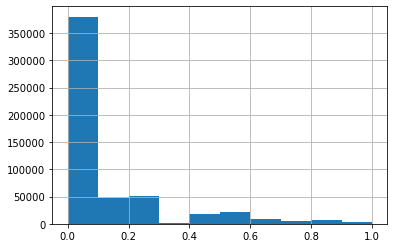

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)
#Random forest clasiffier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(max_depth=10)
rfc.fit(X_dtm_A, y_train)

pred1 = rfc.predict(X_dtm_A_test)

MSE = mean_squared_error(y_test, pred1)

print(MSE)

0.03056114899145262


In [ ]:
pred1 = rfc.predict(X_dtm_A_test)

MSE = mean_squared_error(y_test, pred1)

print(MSE)

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
vect_B = CountVectorizer(ngram_range=(3, 3))
X_dtm_B = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)


In [16]:
rfc2 = RandomForestRegressor(max_depth=10)
rfc2.fit(X_dtm_B,y_train)

pred2 = rfc2.predict(X_dtm_B_test)

MSE2 = mean_squared_error(y_test, pred2)
print(MSE)

KeyboardInterrupt: 

In [20]:
!pip install xgboost

^C


In [22]:
from xgboost import XGBRegressor

clf = XGBRegressor()
clf

clf.fit(X_dtm_B, y_train)
y_pred = clf.predict(X_dtm_B_test)



NameError: name 'pred2' is not defined

In [23]:

MSE2 = mean_squared_error(y_test, y_pred)
print(MSE2)

0.03663440486459287


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
#Celda 3
TfidfVectorizer


TF-IDF es una abreviatura de Term Frequency Inverse Document Frequency. Este es un algoritmo muy común para transformar el texto en una representación significativa de números que se utiliza para ajustar el algoritmo de la máquina para la predicción.

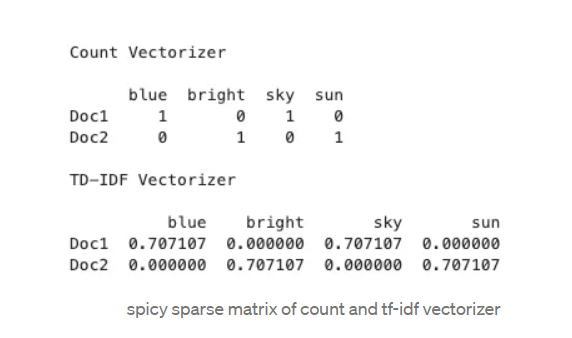

En este ejemplo podemos ver cómo en la parte superior tenemos la matriz de CountVectorizer, donde contamos la cantidad de repeticiones que una palabra aparece en el documento, para la matriz inferior, donde vemos la matriz TF-IDF donde vemos la probabilidad de que aparezca la plabra en el documento. Así podemos entender que el concepto de TF (Term Frequency) nos representa el número de veces que el término aparece en el documento, mientra que el IDF(Inverse Document Frecuency) que es una fórmula mostrada a continuación.

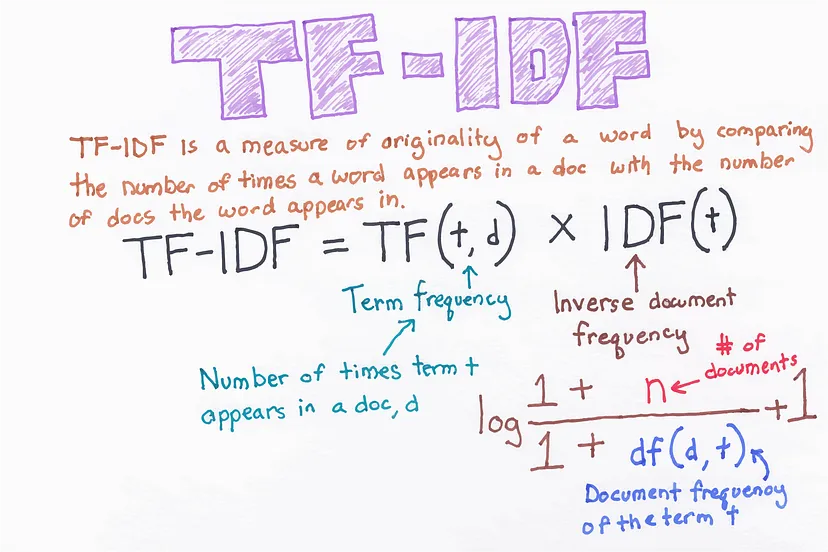


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Celda 4
TF_idf1 = TfidfVectorizer()
Xtf_A = TF_idf1.fit_transform(X_train)
Xtf_A_test = TF_idf1.transform(X_test)


In [25]:
clf2 = XGBRegressor()
clf2.fit(Xtf_A, y_train)

pred3 = clf2.predict(Xtf_A_test)

MSE3 = mean_squared_error(y_test, pred3)
print(MSE3)

0.020343818478258637


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

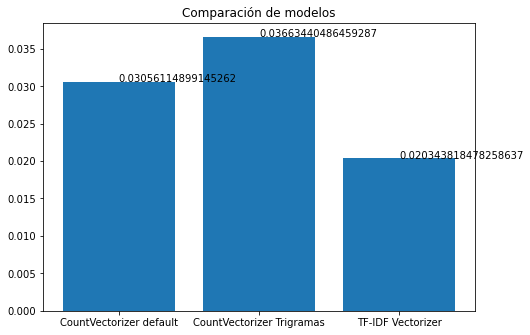

In [27]:
# Celda 5
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['CountVectorizer default','CountVectorizer Trigramas' ,'TF-IDF Vectorizer',]
ejeY = [MSE,MSE2,MSE3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


En esta gráfica podemos revisar la comparación de los MSE con cada algorítmo de transformación de texto. Estos algoritmos junto con el modelado de un XGBoostRegressor nos permitió analizar si los comentarios eran tóxicos o no, obtuvimos que los 3 modelos generaban un overfitting  prediciendo un alto porcentaje de los comentarios, de los cuales podríamos modelar algunas características para evitar ese overfitting y que nos genere un modelo más ajustado a la realidad, revisando caracterísiticas sintácticas, o lenguaje usado en los mismos, si se pudo generar ambigüedad en el modelado.

En conclusión de los 3 modelos, obtuvimos una mejor predicción gracias al algoritmo de TF-IDF el cual nos permitió que la predicción del target fuese mucho mejor que los otros dos modelos.
Podríamos verificar si estos valores tan bajos del MSE son ajustados a la realidad, esto con un conjunto de datos adicional donde se pueda corroborar la calidad de nuestro modelo.